In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 241 * pt
aspect_ratio = (1 + 8 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='paper', rc={'axes.facecolor': 'white', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})

colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92"]

In [15]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 241 * pt
aspect_ratio = (1 + 5 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='talk', rc={'savefig.transparent': True, 'figure.figsize': (fig_width, fig_width/aspect_ratio)})

colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92"]

In [3]:
df = pd.read_csv("Energy Awareness in HPC_September 16, 2024_12.48.csv")
questions = df.iloc[0, :]
df = df.drop([0,1], axis=0)
questions

StartDate                                           Start Date
EndDate                                               End Date
Status                                           Response Type
IPAddress                                           IP Address
Progress                                              Progress
                                   ...                        
Q25_1        What percent of your jobs would it be acceptab...
Q25_2        What percent of your jobs would it be acceptab...
Q25_3        What percent of your jobs would it be acceptab...
Q25_4        What percent of your jobs would it be acceptab...
Q40          Could your jobs be run in a "malleable" way, s...
Name: 0, Length: 72, dtype: object

In [4]:
# Filter out data recorded before we distributed the survey - this will internal responses
df["RecordedDate"] = pd.to_datetime(df["RecordedDate"])
df = df[df["RecordedDate"] >= pd.to_datetime("2024-8-15")]
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q33_2,Q33_3,Q33_4,Q33_5,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q40
21,2024-08-15 11:02:16,2024-08-15 11:06:52,IP Address,73.51.254.248,100,276,True,2024-08-15 11:06:53,R_61XAzv7OswRlSeq,NaN,...,3 (Very Important),2,1 (Not important),3 (Very Important),No,25-50%,25-50%,25-50%,0-25%,No
22,2024-08-15 12:24:26,2024-08-15 12:26:49,IP Address,128.135.204.170,100,142,True,2024-08-15 12:26:50,R_8bZPZK3L0DXDAc1,NaN,...,3 (Very Important),1 (Not important),1 (Not important),3 (Very Important),No,50-75%,0-25%,25-50%,0-25%,Maybe
23,2024-08-15 17:53:01,2024-08-15 18:12:06,IP Address,169.150.203.18,100,1144,True,2024-08-15 18:12:07,R_41AtyexdyztGo9m,NaN,...,3 (Very Important),2,2,2,No,75-100%,50-75%,25-50%,0-25%,Maybe
24,2024-08-16 09:22:29,2024-08-16 09:26:20,IP Address,73.72.55.234,100,231,True,2024-08-16 09:26:21,R_5ps7yA52Tupfl3y,NaN,...,3 (Very Important),2,1 (Not important),3 (Very Important),Yes,50-75%,25-50%,0-25%,0-25%,Maybe
25,2024-08-16 09:41:57,2024-08-16 12:59:01,IP Address,128.135.204.94,100,11824,True,2024-08-16 12:59:01,R_1rVihs5AuZP76YH,NaN,...,3 (Very Important),3 (Very Important),2,2,Yes,25-50%,50-75%,75-100%,0-25%,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2024-09-05 10:09:36,2024-09-05 10:12:00,IP Address,134.158.229.132,23,143,False,2024-09-12 10:12:02,R_24uUQLZWVrppe90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,2024-09-05 12:20:44,2024-09-05 12:36:13,IP Address,205.175.106.242,3,928,False,2024-09-12 12:36:17,R_196ugKj2OWqmoxK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,2024-09-06 06:59:07,2024-09-06 06:59:17,IP Address,195.176.112.135,3,9,False,2024-09-13 06:59:17,R_2atNGxjjsMik7oX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,2024-09-09 03:49:30,2024-09-09 03:50:08,IP Address,140.77.82.129,9,37,False,2024-09-16 03:50:09,R_8mK2TD1qJ7T0RNx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Count', ylabel='Progress'>

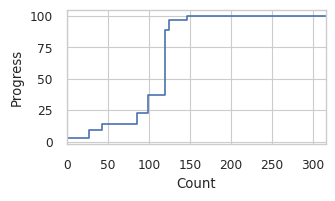

In [5]:
df["Progress"] = df["Progress"].astype(float)
sns.ecdfplot(data=df, y="Progress", stat="count")

In [6]:
len(df[df["Progress"] > 90])

192

In [7]:
len(df[df["Finished"] == "True"])

169

In [8]:
questions[15:]

DistributionChannel                                 Distribution Channel
UserLanguage                                               User Language
Career Stage           Which career stage/role best describes your cu...
Q54                             What region of the world do you live in?
Q3                     How many different computing systems do you ha...
Q4                     How many different types of nodes do you have ...
Q6                     How many different types of nodes have you use...
Q43                    Approximately how many node hours do you use i...
Q11                    Please briefly characterize how you use HPC re...
Q13                    What is the average size of the jobs you run o...
Q12                    What is the average duration of jobs you run o...
Q14                    Are you aware of how many node-hours your work...
Q15                    Have you taken steps to reduce the amount of n...
Q16                    How concerned are you about 

In [9]:
questions.loc["Q25_3"]

'What percent of your jobs would it be acceptable to delay to each given deadline? - Within 1 Day'

Q54
Asia               4
Europe           166
North America    104
Oceania            4
dtype: int64

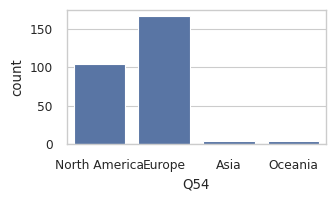

In [10]:
sns.countplot(data=df, x="Q54")
df.groupby("Q54").size()

In [11]:
df.groupby("Career Stage").size()

Career Stage
Early Career Researcher/Engineer    97
Graduate Student                    73
Other                                6
Senior Researcher/Engineer          99
Undergraduate Student                2
dtype: int64

/tmp/ipykernel_614/3253267831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="value", data=pd.melt(df[["Q4"]]), order=["1-4", "5-9", "10-14", "15-19", "20+"], ax=ax[0], width=1, palette=colors)
/tmp/ipykernel_614/3253267831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="value", data=pd.melt(df[["Q6"]]), order=["1-4", "5-9", "10-14", "15-19", "20+"], ax=ax[1], width=1, palette=colors)
/tmp/ipykernel_614/3253267831.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45, ha="center", va="center")
/tmp/ipykernel_614/3253267831.py:7: UserWarning: FixedFormatter should only be used to

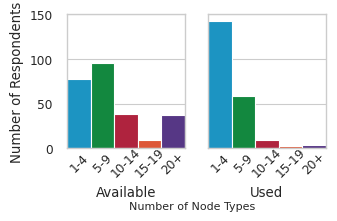

In [12]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.countplot(x="value", data=pd.melt(df[["Q4"]]), order=["1-4", "5-9", "10-14", "15-19", "20+"], ax=ax[0], width=1, palette=colors)
sns.countplot(x="value", data=pd.melt(df[["Q6"]]), order=["1-4", "5-9", "10-14", "15-19", "20+"], ax=ax[1], width=1, palette=colors)
ax[0].set_xlabel("Available")
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45, ha="center", va="center")
ax[1].set_xlabel("Used")
ax[1].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45, ha="center", va="center")
ax[0].set_ylabel("Number of Respondents")
fig.supxlabel("Number of Node Types", y=-0.25, fontsize="small")
plt.savefig("figures/node_types.pdf")
plt.savefig("figures/node_types_presentation.png")

 0.0    102
 1.0     66
 2.0     19
 3.0     14
 4.0     11
-1.0      3
Name: UsedDiff, dtype: int64

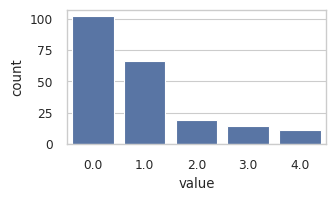

In [13]:
order = ["1-4", "5-9", "10-14", "15-19", "20+"]
df["UsedDiff"] = pd.to_numeric(df["Q4"].replace(order, range(5))) - pd.to_numeric(df["Q6"].replace(order, range(5)))
# display(df["Q4"])
# df["Q6"] = df["Q4"].replace(order, range(5))
# df["UsedDiff"] = df["Q4"] - df["Q6"]
sns.countplot(x="value", data=pd.melt(df[["UsedDiff"]]), order=[0.0, 1.0, 2.0, 3.0, 4.0])
df["UsedDiff"].value_counts(normalize=True)
df["UsedDiff"].value_counts()

/tmp/ipykernel_614/896577485.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(labels=ax[1][0].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
/tmp/ipykernel_614/896577485.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(labels=ax[1][1].get_xticklabels(), rotation=45, ha="right", va="center_baseline")


Text(-0.1, 0.5, 'Count')

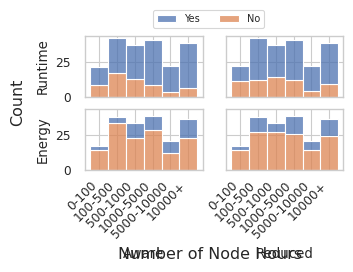

In [14]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
order = ["0-100", "100-500", "500-1000", "1000-5000", "5000-10000", "10000+"]
df['Q43'] = pd.Categorical(df['Q43'], order)

sns.histplot(df, x="Q43", hue="Q14", multiple="stack", hue_order=["Yes", "No"], ax=ax[0][0])
sns.histplot(df, x="Q43", hue="Q15", multiple="stack", hue_order=["Yes", "No"], ax=ax[0][1])
sns.histplot(df, x="Q43", hue="Q17", multiple="stack", hue_order=["Yes", "No"], ax=ax[1][0])
sns.histplot(df, x="Q43", hue="Q19", multiple="stack", hue_order=["Yes", "No"], ax=ax[1][1])

sns.move_legend(ax[0][0], "lower center", bbox_to_anchor=(1.05, 1.05), ncol=2, title=None, fontsize=7)
ax[1][0].set_xticklabels(labels=ax[1][0].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax[1][1].set_xticklabels(labels=ax[1][1].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax[0][1].get_legend().remove()
ax[1][0].get_legend().remove()
ax[1][1].get_legend().remove()
ax[0][0].set_ylabel("Runtime")
ax[1][0].set_ylabel("Energy")
ax[1][0].set_xlabel("Aware")
ax[1][1].set_xlabel("Reduced")
fig.supxlabel("Number of Node Hours", y=-0.42)
fig.supylabel("Count", x=-0.1)

/tmp/ipykernel_614/873827431.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(labels=ax[1][0].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
/tmp/ipykernel_614/873827431.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(labels=ax[1][1].get_xticklabels(), rotation=45, ha="right", va="center_baseline")


Text(-0.1, 0.5, 'Count')

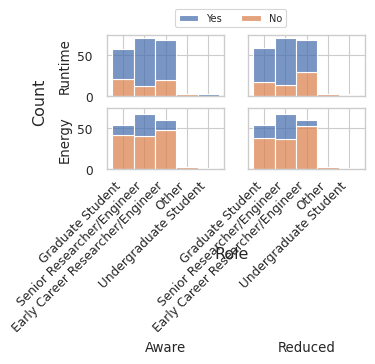

In [15]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
# order = ["0-100", "100-500", "500-1000", "1000-5000", "5000-10000", "10000+"]
# df['Q43'] = pd.Categorical(df['Q43'], order)

sns.histplot(df, x="Career Stage", hue="Q14", multiple="stack", hue_order=["Yes", "No"], ax=ax[0][0])
sns.histplot(df, x="Career Stage", hue="Q15", multiple="stack", hue_order=["Yes", "No"], ax=ax[0][1])
sns.histplot(df, x="Career Stage", hue="Q17", multiple="stack", hue_order=["Yes", "No"], ax=ax[1][0])
sns.histplot(df, x="Career Stage", hue="Q19", multiple="stack", hue_order=["Yes", "No"], ax=ax[1][1])

sns.move_legend(ax[0][0], "lower center", bbox_to_anchor=(1.05, 1.05), ncol=2, title=None, fontsize=7)
ax[1][0].set_xticklabels(labels=ax[1][0].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax[1][1].set_xticklabels(labels=ax[1][1].get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax[0][1].get_legend().remove()
ax[1][0].get_legend().remove()
ax[1][1].get_legend().remove()
ax[0][0].set_ylabel("Runtime")
ax[1][0].set_ylabel("Energy")
ax[1][0].set_xlabel("Aware")
ax[1][1].set_xlabel("Reduced")
fig.supxlabel("Role", y=-0.42)
fig.supylabel("Count", x=-0.1)

/tmp/ipykernel_614/3004308843.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(temp_df, x="Metric", y="Proportion", hue="Action", ax=ax, palette=colors)


[['Aware of Metric', 'Node Hours', 0.729064039408867], ['Reduced Metric', 'Node Hours', 0.696078431372549], ['Aware of Metric', 'Energy', 0.27419354838709675], ['Reduced Metric', 'Energy', 0.2903225806451613]]


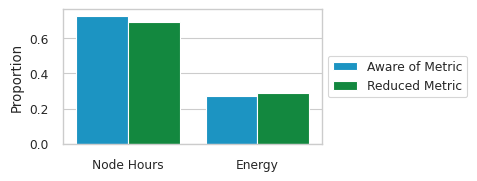

In [16]:
temp_data = [
    ["Aware of Metric", "Node Hours", (df["Q14"] == "Yes").sum()/((df["Q14"] == "Yes").sum() + (df["Q14"] == "No").sum())], 
    ["Reduced Metric", "Node Hours", (df["Q15"] == "Yes").sum()/((df["Q15"] == "Yes").sum() + (df["Q15"] == "No").sum())],
    ["Aware of Metric", "Energy", (df["Q17"] == "Yes").sum()/((df["Q17"] == "Yes").sum() + (df["Q17"] == "No").sum())], 
    ["Reduced Metric", "Energy", (df["Q19"] == "Yes").sum()/((df["Q19"] == "Yes").sum() + (df["Q19"] == "No").sum())]
]

temp_df = pd.DataFrame(temp_data, columns=["Action", "Metric", "Proportion"])
fig ,ax = plt.subplots(1,1)
sns.barplot(temp_df, x="Metric", y="Proportion", hue="Action", ax=ax, palette=colors)
sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))
ax.set_xlabel(None)
ax.get_legend().set_title(None)
plt.savefig("figures/awareness_comparison.pdf")
plt.savefig("figures/awareness_comparison_talk.png")
print(temp_data)

In [26]:
display(df["Q14"].value_counts())
display(df["Q15"].value_counts())
display(df["Q17"].value_counts())
display(df["Q19"].value_counts())

Yes    148
No      55
Name: Q14, dtype: int64

Yes    142
No      62
Name: Q15, dtype: int64

No     135
Yes     51
Name: Q17, dtype: int64

No     132
Yes     54
Name: Q19, dtype: int64

In [17]:
display(df[df["Q17"] == "Yes"]["Q19"].value_counts(normalize=True))
display(df[df["Q19"] == "Yes"]["Q17"].value_counts(normalize=True))

Yes    0.647059
No     0.352941
Name: Q19, dtype: float64

Yes    0.611111
No     0.388889
Name: Q17, dtype: float64

Text(0.5, 0, 'Aware of Energy')

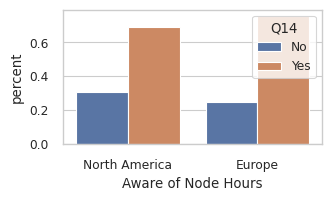

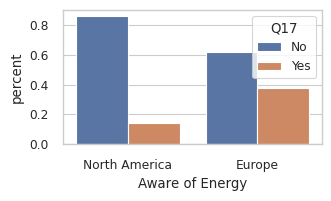

In [18]:
df1 = df.groupby("Q54")["Q14"].value_counts(normalize=True)
# df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

fig, ax = plt.subplots(1,1)
sns.barplot(data=df1, x="Q54", y='percent', hue="Q14", order=["North America", "Europe"], hue_order=["No", "Yes"], ax=ax)
ax.set_xlabel("Aware of Node Hours")

df1 = df.groupby("Q54")["Q17"].value_counts(normalize=True)
# df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

fig, ax = plt.subplots(1,1)
sns.barplot(data=df1, x="Q54", y='percent', hue="Q17", order=["North America", "Europe"], hue_order=["No", "Yes"], ax=ax)
ax.set_xlabel("Aware of Energy")

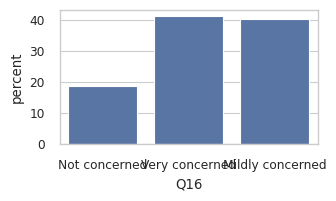

([<matplotlib.patches.Wedge at 0x7fd91d55fbe0>,
 [Text(0.3010292715984893, 1.058008212463818, 'Very concerned'),
  Text(-0.8353453715321247, -0.7156801731638629, 'Mildly concerned'),
  Text(0.9169626733805833, -0.6076013953462696, 'Not concerned')])

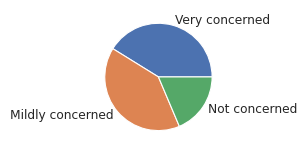

In [19]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=df[~df["Q16"].isna()], x="Q16", stat="percent", ax=ax)
plt.show()

fig, ax = plt.subplots(1,1)
data = df[~df["Q16"].isna()]["Q16"].value_counts(normalize=True)
ax.pie(data, labels=data.index, colors=sns.color_palette()[0:3])

In [27]:
display(df["Q16"].value_counts())

Very concerned      84
Mildly concerned    82
Not concerned       38
Name: Q16, dtype: int64

In [20]:
filtered = df[~df["Q16"].isna()]
filtered[filtered["Q16"] == "Very concerned"]["Q15"].value_counts(normalize=True)

Yes    0.77381
No     0.22619
Name: Q15, dtype: float64

<Axes: xlabel='Q17', ylabel='percent'>

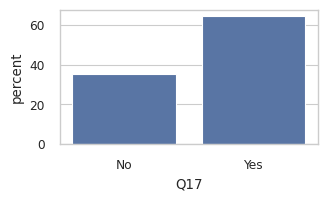

In [21]:
sns.countplot(df[df["Q45"].astype(str).str.contains("Energy")], x="Q17", order=["No", "Yes"], stat="percent")

<Axes: xlabel='Q19', ylabel='percent'>

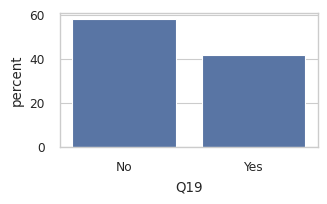

In [22]:
sns.countplot(df[df["Q45"].astype(str).str.contains("Energy")], x="Q19", stat="percent")

/tmp/ipykernel_614/1540622395.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon Intensity", "PUE", "DVFS", "Vendor Fact Sheets"])


variable
Q21_1    94
Q21_2    25
Q21_3    55
Q21_4    50
Q21_5    83
Q21_6    57
dtype: int64

variable
Q21_1    0.510870
Q21_2    0.136612
Q21_3    0.302198
Q21_4    0.273224
Q21_5    0.453552
Q21_6    0.313187
dtype: float64

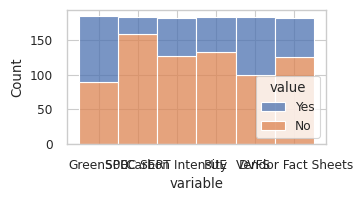

In [23]:
df1 = pd.melt(df[["Q21_1", "Q21_2", "Q21_3", "Q21_4", "Q21_5", "Q21_6"]])
fig, ax = plt.subplots(1,1)
# sns.countplot(data=df1[df1["value"] == "Yes"], x="variable", ax=ax)
sns.histplot(data=df1, x="variable", hue="value", multiple="stack", stat="count", ax=ax)
ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon Intensity", "PUE", "DVFS", "Vendor Fact Sheets"])
display(df1[df1["value"] == "Yes"].groupby("variable").size())
df1[df1["value"] == "Yes"].groupby("variable").size()/ df1.dropna(subset="value").groupby("variable").size()

/tmp/ipykernel_614/438072196.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df1, x="variable", hue="value", multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.7)
/tmp/ipykernel_614/438072196.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon\nIntensity", "PUE"], rotation=20)


variable
Q20_1    36
Q20_2     8
Q20_3    27
Q20_4    29
dtype: int64

variable
Q20_1    0.197802
Q20_2    0.043956
Q20_3    0.148352
Q20_4    0.160221
dtype: float64

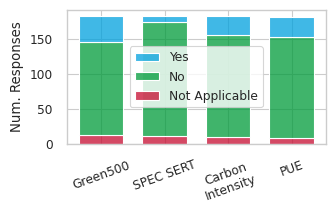

In [31]:
df1 = pd.melt(df[["Q20_1", "Q20_2", "Q20_3", "Q20_4"]])
fig, ax = plt.subplots(1,1)
sns.histplot(data=df1, x="variable", hue="value", multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.7)
# sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0))
ax.set_xticklabels(["Green500", "SPEC SERT", "Carbon\nIntensity", "PUE"], rotation=20)
ax.set_xlabel(None)
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)
plt.savefig("figures/use_of_tools.pdf")
plt.savefig("figures/use_of_tools_talk.png")
display(df1[df1["value"] == "Yes"].groupby("variable").size())
df1[df1["value"] == "Yes"].groupby("variable").size()/ df1.dropna(subset="value").groupby("variable").size()

/tmp/ipykernel_74/3987306393.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.histplot(data=df1, x="variable", hue="value", hue_order=["1 (Not Important)", "2", "3 (Very Important)"], multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.75)
/tmp/ipykernel_74/3987306393.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(question_map.keys()), rotation=30, ha='right')


variable
Q22_1     77
Q22_2    115
Q22_3    122
Q22_4     83
Q22_5     25
Q22_6     80
Q22_7     75
Q22_8     60
dtype: int64

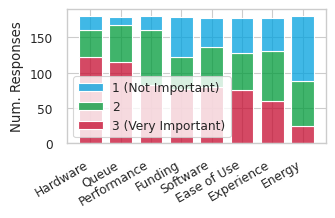

In [13]:
question_map = {
    "Hardware": "Q22_3",
    "Queue": "Q22_2",
    "Performance": "Q22_4",
    "Funding": "Q22_1",
    "Software": "Q22_6",
    "Ease of Use": "Q22_7",
    "Experience": "Q22_8",
    "Energy": "Q22_5"    
}
df1 = pd.melt(df[list(question_map.values())])
df1.loc[df1["value"] == "1 (Not important)", "value"] = "1 (Not Important)"
# df1 = df1.groupby("variable")["value"].value_counts(normalize=True).rename("proportion").reset_index()
# display(df1)
fig, ax = plt.subplots(1,1)
sns.histplot(data=df1, x="variable", hue="value", hue_order=["1 (Not Important)", "2", "3 (Very Important)"], multiple="stack", stat="count", ax=ax, palette=colors, shrink=0.75)
# sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0))
ax.set_xticklabels(list(question_map.keys()), rotation=30, ha='right')
ax.set_xlabel(None)
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)
plt.savefig("figures/selection_priority.pdf")
plt.savefig("figures/selection_priority_talk.png")

df1[df1["value"] == "3 (Very Important)"].groupby("variable").size()

In [16]:
df["Q22_5"].value_counts(normalize=True)

1 (Not important)     0.511111
2                     0.350000
3 (Very Important)    0.138889
Name: Q22_5, dtype: float64

In [17]:
df["Q22_4"].value_counts(normalize=True)

3 (Very Important)    0.458564
2                     0.425414
1 (Not important)     0.116022
Name: Q22_4, dtype: float64

/tmp/ipykernel_75/2893903456.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", va="center_baseline")


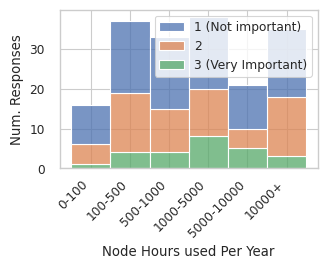

In [26]:
fig, ax = plt.subplots()
sns.histplot(df, x="Q43", hue="Q22_5", multiple="stack", ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax.set_xlabel("Node Hours used Per Year")
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)

/tmp/ipykernel_75/1340529537.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", va="center_baseline")


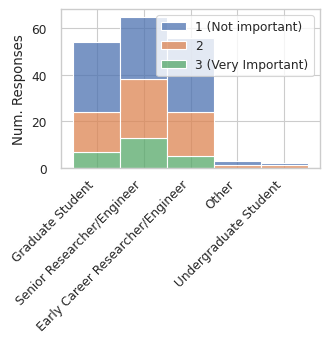

In [27]:
fig, ax = plt.subplots()
sns.histplot(df, x="Career Stage", hue="Q22_5", multiple="stack", ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", va="center_baseline")
ax.set_xlabel(None)
ax.set_ylabel("Num. Responses")
ax.get_legend().set_title(None)

Text(0.5, 1.0, 'Estimated CPU Utilization')

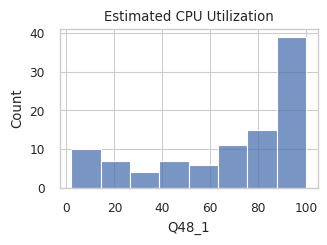

In [28]:
df["Q48_1"] = df["Q48_1"].astype(float)
sns.histplot(data=df, x="Q48_1")
plt.title("Estimated CPU Utilization")

Text(0.5, 1.0, 'Estimated GPU Utilization')

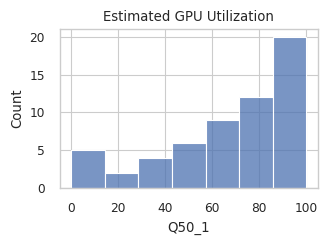

In [29]:
df["Q50_1"] = df["Q50_1"].astype(float)
sns.histplot(data=df, x="Q50_1")
plt.title("Estimated GPU Utilization")

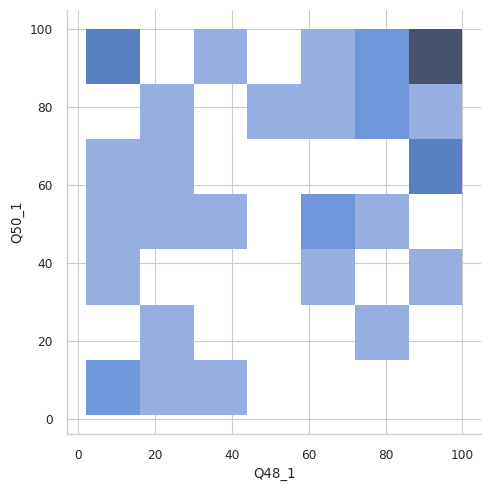

In [30]:
sns.displot(data=df, x="Q48_1", y="Q50_1", legend="full")

Text(0.5, 1.0, 'Estimated Memory Utilization')

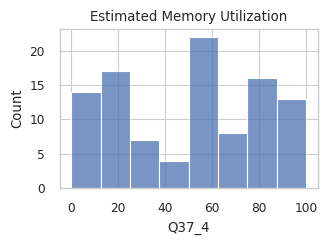

In [31]:
df["Q37_4"] = df["Q37_4"].astype(float)
sns.histplot(data=df, x="Q37_4")
plt.title("Estimated Memory Utilization")

In [33]:
df.groupby("Q24").size()

Q24
No     86
Yes    91
dtype: int64

In [39]:
df["Q24"].value_counts(normalize=True)

Yes    0.514124
No     0.485876
Name: Q24, dtype: float64

In [34]:
df.groupby("Q40").size()

Q40
Maybe    105
No        30
Yes       46
dtype: int64

In [40]:
df["Q40"].value_counts(normalize=True)

Maybe    0.580110
Yes      0.254144
No       0.165746
Name: Q40, dtype: float64

In [41]:
df.groupby("Q25_1").size()

Q25_1
0-25%      73
25-50%     28
50-75%     25
75-100%    45
dtype: int64

In [42]:
df.groupby("Q25_2").size()

Q25_2
0-25%      37
25-50%     64
50-75%     35
75-100%    30
dtype: int64

In [43]:
df.groupby("Q25_3").size()

Q25_3
0-25%      61
25-50%     51
50-75%     32
75-100%    26
dtype: int64

In [35]:
df.value_counts(subset=["Q40", "Q25_3"], normalize=True)

Q40    Q25_3  
Maybe  0-25%      0.200000
       25-50%     0.170588
       50-75%     0.117647
No     0-25%      0.088235
Maybe  75-100%    0.082353
Yes    25-50%     0.076471
       0-25%      0.070588
No     25-50%     0.052941
Yes    50-75%     0.052941
       75-100%    0.052941
No     50-75%     0.017647
       75-100%    0.017647
dtype: float64

In [37]:
8.8 + 5.3

14.100000000000001

In [46]:
df["Q25_3"].value_counts(normalize=True)

0-25%      0.358824
25-50%     0.300000
50-75%     0.188235
75-100%    0.152941
Name: Q25_3, dtype: float64

In [44]:
df.groupby("Q25_4").size()

Q25_4
0-25%      117
25-50%      20
50-75%       9
75-100%     19
dtype: int64